# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, you will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

## The [Environment](https://github.com/iamlucaswolf/gym-chess)

The environment gym-chess provides OpenAI Gym environments for the game of Chess. It comes with an implementation of the board and move encoding used in AlphaZero. 

Please install it using the command: 

`pip install gym-chess`

In [1]:
#%pip install stockfish
#!pip install python-chess

In [2]:
#%pip install gym_chess

In [3]:
#%pip install gym

In [4]:
#%pip install ipywidgets

In [5]:
#!jupyter nbextension enable --py widgetsnbextension

In [6]:
import chess
#import gymnasium as gym
import gym
import gym_chess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [7]:
import random
import math

### A Two player's game

As you know chess is played by two players, as such the gym-chess environment gives you access to both players actions in a sequential matter.

In [8]:
def WHITE_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action


def BLACK_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action

In [9]:
env = gym.make('ChessAlphaZero-v0')  # We will use Alpha Zero's numenclature for the actions encodings

state = env.reset()
done = False
counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

while not done:
    if (
        counter % 2 == 0
    ):  # If the step number is pair, this means that it is the WHITE player's turn
        action = WHITE_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
        action = BLACK_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    counter += 1

print(reward)

env.close()

0.0


#### The agent receives a reward of +1 when the white player makes a winning move, and a reward of -1 when the black player makes a winning move. 

All other rewards are zero.

### Evaluationg your agent with [Stockfish](https://github.com/zhelyabuzhsky/stockfish)

In order to have a good enough idea that our agent is actually playing well we need a benchmarkable opponent.

As such we need to install stockfish a free and open-source chess engine. Stockfish has consistently ranked first or near the top of most chess-engine rating lists and, as of April 2023, is the strongest CPU chess engine in the world.

`pip install stockfish`


In [10]:
from stockfish import Stockfish

StockFish has a python api as seen above, nevertheless the engine still needs to be downloaded [here](https://stockfishchess.org/download/) and used in the path.

NOTE: You were given an engine already in moodle, nevertheless different computer systems (Windows, Mac, Ubuntu) might require other Stockfish engines.

In [11]:
# David
Stockfish_path = "C:/Users/David/Desktop/Nova IMS/2º semestre/Reinforcement Learning/project/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"

The functions bellow generate episodes/games for a WHITE or BLACK Pieces Scenario respectively. We store the outcome of the episode (win/draw/loss) and the number of steps taken.

#### Notice how the AGENT_POLICY function is used it recieves as inputs the env and the current state.
`action = AGENT_POLICY(env, state)`

In [12]:
def generate_WHITE_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is pair, this means that it is the WHITE player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)


def generate_BLACK_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is pair, this means that it is the WHITE player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)

In the function bellow a visualization is produced from the bechmarks made.

In [13]:
def AGENT_EVALUATION(Stockfish_path, AGENT_POLICY, n_evaluations=100):
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode = generate_WHITE_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])

        generate_episode = generate_BLACK_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

In [ ]:
df = AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, n_evaluations=5)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df.head(5)

# Ready to Play Chess?

## Neural Network

In [14]:
import numpy as np
import chess
from tensorflow import keras

# Set the initial state
state = chess.Board()

# Set the counter for the number of steps
counter = 0

# Define the Neural Network Model
input_shape = 64  # The input shape should match the size of your state representation
action_space_size = len(list(state.legal_moves))  # Update the action space size based on the number of legal moves
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(action_space_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Define the function to preprocess the state
def preprocess_state(state):
    # Convert the chess board state to a binary representation
    binary_state = np.zeros(64, dtype=np.float32)

    for i in range(64):
        piece = state.piece_at(i)
        if piece is not None:
            piece_value = {'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
                           'p': -1, 'n': -2, 'b': -3, 'r': -4, 'q': -5, 'k': -6}
            binary_state[i] = piece_value[piece.symbol()]

    return binary_state

# Define the function to select an action
def select_action(state):
    while True:
        state_input = np.array([preprocess_state(state)])
        action_probabilities = model.predict(state_input)[0]
        action = np.random.choice(action_space_size, p=action_probabilities)
        moves = list(state.legal_moves)
        if action < len(moves):
            return action

# Define the training loop
def train_agent(model, num_episodes):
    for episode in range(num_episodes):
        state = chess.Board()  # Reset the state at the beginning of each episode
        done = False
        counter = 0
        while not done:
            action = select_action(state)
            moves = list(state.legal_moves)
            move = moves[action]
            state.push(move)
            counter += 1

            state_input = np.array([preprocess_state(state)])
            next_state_input = state_input  # In chess, the next state is the same as the current state after making a move
            if action < action_space_size:
                target = model.predict(state_input)
                target[0][action] = 1.0  # The target for the selected action is 1.0 (assuming a perfect policy)
                model.fit(state_input, target, epochs=1, verbose=0)

            done = state.is_game_over()

        print("Episode:", episode+1, "Steps:", counter)
        # Save the trained model
    model.save('chess_agent_nn.h5')

# Train the agent
nn_agent = train_agent(model, num_episodes=1)


1/1 [==============================] - 0s 40ms/step
Episode: 1 Steps: 103


In [15]:
import chess
import chess.engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

def preprocess_state(board):
    """
    Preprocess the chess board state.

    Args:
        board (chess.Board): The chess board.

    Returns:
        np.array: The preprocessed state array.
    """
    state_array = np.zeros(64)
    for i in range(64):
        piece = board.piece_at(i)
        if piece is not None:
            state_array[i] = piece.piece_type
    return state_array

def select_action(board, policy):
    """
    Select an action using the policy network.

    Args:
        board (chess.Board): The chess board.
        policy (tf.keras.Model): The policy network model.

    Returns:
        int: The index of the selected action.
    """
    state_array = preprocess_state(board)
    state_input = np.array([state_array])
    action_probabilities = policy.predict(state_input)[0]
    valid_moves = list(board.legal_moves)
    valid_move_indices = [move_to_index(move) for move in valid_moves]

    valid_action_probabilities = []
    for i in valid_move_indices:
        if i < len(action_probabilities):
            valid_action_probabilities.append(action_probabilities[i])
        else:
            valid_action_probabilities.append(0.0)

    total_prob = sum(valid_action_probabilities)

    if total_prob == 0.0:
        action = np.random.choice(len(valid_moves))
    else:
        valid_action_probabilities = [prob / total_prob for prob in valid_action_probabilities]
        action = np.random.choice(len(valid_moves), p=valid_action_probabilities)

    return valid_moves[action]

def move_to_index(move):
    """
    Convert a chess move to an index.

    Args:
        move (chess.Move): A chess move.

    Returns:
        int: The index corresponding to the move.
    """
    return move.from_square * 64 + move.to_square

def generate_episode(stockfish_path, agent_policy):
    """
    Generate a single episode of the game.

    Args:
        stockfish_path (str): The file path to the Stockfish engine.
        agent_policy (tf.keras.Model): The policy network model.

    Returns:
        int: The reward for the episode (1 for victory, -1 for defeat, 0 for draw).
        int: The number of steps taken in the episode.
    """
    engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
    board = chess.Board()
    counter = 0

    while not board.is_game_over():
        if board.turn == chess.WHITE:
            # Agent's turn
            action = select_action(board, agent_policy)
        else:
            # Stockfish's turn
            result = engine.play(board, chess.engine.Limit(time=2.0))
            action = result.move

        board.push(action)
        counter += 1

    result = None
    if board.is_checkmate():
        result = 1 if board.turn == chess.BLACK else -1
    elif board.is_stalemate() or board.is_insufficient_material() or board.is_seventyfive_moves():
        result = 0

    engine.quit()
    return result, counter

def AGENT_EVALUATION(Stockfish_path, AGENT_POLICY, n_evaluations=100):
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode_white = generate_episode
        reward_white, n_steps_white = generate_episode_white(Stockfish_path, AGENT_POLICY)
        if reward_white == 1:
            result_white = "VICTORY"
        elif reward_white == 0:
            result_white = "DRAW"
        else:
            result_white = "LOSS"

        results_list.append(["WHITE", result_white, n_steps_white])

        generate_episode_black = generate_episode
        reward_black, n_steps_black = generate_episode_black(Stockfish_path, AGENT_POLICY)
        if reward_black == -1:
            result_black = "VICTORY"
        elif reward_black == 0:
            result_black = "DRAW"
        else:
            result_black = "LOSS"

        results_list.append(["BLACK", result_black, n_steps_black])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 0s 48ms/step


 20%|████████████████▊                                                                   | 1/5 [00:52<03:31, 52.99s/it]

1/1 [==============================] - 0s 40ms/step


 40%|█████████████████████████████████▌                                                  | 2/5 [01:49<02:45, 55.22s/it]

1/1 [==============================] - 0s 48ms/step


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [02:54<01:59, 59.71s/it]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [03:44<00:55, 55.68s/it]

1/1 [==============================] - 0s 32ms/step


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:13<00:00, 50.72s/it]


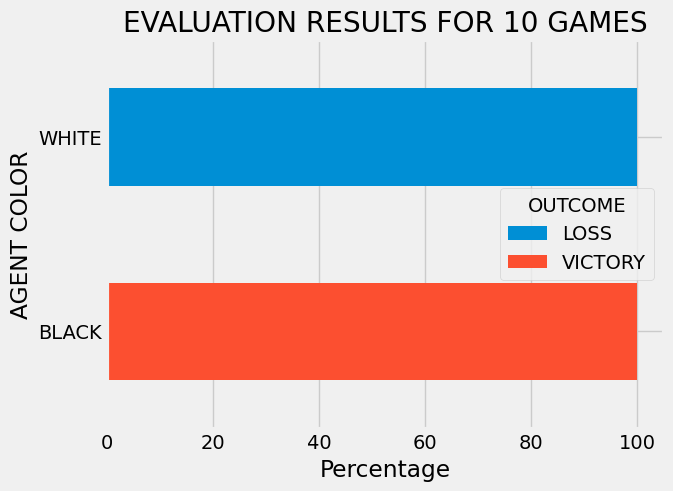

,AGENT COLOR,OUTCOME,N STEPS
0,WHITE,LOSS,22
1,BLACK,VICTORY,36
2,WHITE,LOSS,40
3,BLACK,VICTORY,22
4,WHITE,LOSS,22
5,BLACK,VICTORY,44
6,WHITE,LOSS,26
7,BLACK,VICTORY,24
8,WHITE,LOSS,22
9,BLACK,VICTORY,14


In [16]:
AGENT_EVALUATION(Stockfish_path, model, n_evaluations=5)

In [ ]:
########################################

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set up the chess environment
env = chess.Board()

# Define the Deep Q-Network (DQN) architecture
def build_dqn(input_shape, output_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_shape, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# Define other necessary variables
state_shape = (64,)  # The shape of the state representation
num_actions = len(list(env.legal_moves))  # The number of possible actions

# Create the primary and target DQNs
primary_dqn = build_dqn(state_shape, num_actions)
target_dqn = build_dqn(state_shape, num_actions)
target_dqn.set_weights(primary_dqn.get_weights())

# Define the replay memory
max_memory_capacity = 10000  # The maximum capacity of the replay memory
replay_memory = []

# Define the exploration parameters
epsilon = 1.0  # Initial value of epsilon
epsilon_decay = 0.99  # Decay rate of epsilon over time
epsilon_min = 0.01  # Minimum value of epsilon

# Define the training loop
num_episodes = 1000  # The number of training episodes
batch_size = 32  # The batch size for replay memory sampling
update_target_frequency = 100  # The frequency to update the target network

def move_to_index(move):
    """
    Convert a chess move to an index.

    Args:
        move (chess.Move): A chess move.

    Returns:
        int: The index corresponding to the move.
    """
    return move.from_square * 64 + move.to_square


for episode in range(num_episodes):
    state = env.copy()
    done = False
    total_reward = 0
    
    while not done:
        # Select action using epsilon-greedy strategy
        if np.random.rand() < epsilon:
            action = np.random.randint(num_actions)
        else:
            state_input = np.array([preprocess_state(state)])
            q_values = primary_dqn.predict(state_input)[0]
            moves = list(state.legal_moves)
            legal_actions = [move_to_index(move) for move in moves]
            q_values_legal = [q_values[action] if action in legal_actions else float('-inf') for action in range(num_actions)]
            action = np.argmax(q_values_legal)
        
        # Execute action and observe next state, reward, and done flag
        move = list(state.legal_moves)[action]
        state.push(move)
        next_state = state.copy()
        reward = 1 if state.is_checkmate() else 0
        total_reward += reward
        done = state.is_game_over()
        
        # Store experience in replay memory
        replay_memory.append((preprocess_state(state), action, reward, preprocess_state(next_state), done))
        
        # Limit replay memory capacity
        if len(replay_memory) > max_memory_capacity:
            replay_memory.pop(0)
        
        # Sample a batch of experiences from replay memory
        batch_size = min(batch_size, len(replay_memory))  # Adjust the batch size if it exceeds the replay memory size
        batch_indices = np.random.choice(len(replay_memory), size=batch_size, replace=False)
        batch = [replay_memory[i] for i in batch_indices]
        states_batch, action_batch, reward_batch, next_states_batch, done_batch = zip(*batch)

        # Calculate target Q-values using the target network
        next_q_values = target_dqn.predict(np.array(next_states_batch))
        target_q_values = reward_batch + np.max(next_q_values, axis=1) * (1 - np.array(done_batch))
        
        # Train the primary DQN on the batch
        states_batch = np.array(states_batch)
        target_q_values_full = primary_dqn.predict(states_batch)
        target_q_values_full[np.arange(batch_size), action_batch] = target_q_values
        primary_dqn.train_on_batch(states_batch, target_q_values_full)
        
        # Decay epsilon
        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        
        # Update the target network weights
        if episode % update_target_frequency == 0:
            target_dqn.set_weights(primary_dqn.get_weights())
    
    print(f"Episode: {episode+1}  Reward: {total_reward}")


1/1 [==============================] - 0s 40ms/step


IndexError: list index out of range

In [22]:
import numpy as np
import chess
from tensorflow import keras

# Set the initial state
state = chess.Board()

# Set the counter for the number of steps
counter = 0

# Define the Neural Network Model
input_shape = 64  # The input shape should match the size of your state representation
action_space_size = len(list(state.legal_moves))  # Update the action space size based on the number of legal moves
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(action_space_size, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define the function to preprocess the state
def preprocess_state(state):
    # Convert the chess board state to a binary representation
    binary_state = np.zeros(64, dtype=np.float32)

    for i in range(64):
        piece = state.piece_at(i)
        if piece is not None:
            piece_value = {'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
                           'p': -1, 'n': -2, 'b': -3, 'r': -4, 'q': -5, 'k': -6}
            binary_state[i] = piece_value[piece.symbol()]

    return binary_state

# Define the function to select an action
def select_action(state, primary_dqn, epsilon):
    state_input = np.array([preprocess_state(state)])

    if np.random.rand() < epsilon:
        # Select a random action
        moves = list(state.legal_moves)
        action = np.random.choice(len(moves))
    else:
        # Select action with highest Q-value
        q_values = primary_dqn.predict(state_input)[0]
        legal_actions = [move_to_index(move) for move in state.legal_moves]
        q_values_legal = [q_values[action] if action in legal_actions else float('-inf') for action in range(num_actions)]
        action = np.argmax(q_values_legal)

    move = list(state.legal_moves)[action]
    state.push(move)
    next_state = state.copy()
    reward = get_reward(state)
    done = state.is_game_over()

    return state, move, reward, next_state, done


# Define the training loop
def train_agent(model, num_episodes, replay_memory_capacity, batch_size, discount_factor, epsilon_decay):
    replay_memory = []
    epsilon = 1.0

    for episode in range(num_episodes):
        state = chess.Board()  # Reset the state at the beginning of each episode
        done = False
        counter = 0

        while not done:
            state, action, reward, next_state, done = select_action(state, model, epsilon)

            replay_memory.append((state, action, reward, next_state, done))
            if len(replay_memory) > replay_memory_capacity:
                replay_memory.pop(0)

            if len(replay_memory) >= batch_size:
                # Sample a batch of experiences from replay memory
                batch_indices = np.random.choice(len(replay_memory), size=batch_size, replace=False)
                batch = [replay_memory[i] for i in batch_indices]
                states_batch, action_batch, reward_batch, next_states_batch, done_batch = zip(*batch)

                states_batch = np.array([preprocess_state(state) for state in states_batch])
                next_states_batch = np.array([preprocess_state(state) for state in next_states_batch])
                done_batch = np.array(done_batch)  # Convert done_batch to numpy array

                # Calculate the target Q-values
                q_values_next = model.predict(next_states_batch)
                targets = reward_batch + (1 - done_batch) * discount_factor * np.amax(q_values_next, axis=1)

                # Update the model
                model.fit(states_batch, targets, epochs=1, verbose=0)

            counter += 1
            if counter % epsilon_decay == 0:
                epsilon = max(0.1, epsilon * 0.99)  # Decay the exploration rate

    return model


# Define the function to get the reward
def get_reward(state):
    # Implement your reward function here based on the current state
    # Return a reward value

    return reward  # Placeholder reward value

# Set the hyperparameters
num_episodes = 50
replay_memory_capacity = 10000
batch_size = 32
discount_factor = 0.99
epsilon_decay = 100

# Train the agent
trained_model = train_agent(model, num_episodes, replay_memory_capacity, batch_size, discount_factor, epsilon_decay)


1/1 [==============================] - 0s 136ms/step


NameError: name 'num_actions' is not defined

In [23]:
import numpy as np
import chess
from tensorflow import keras

# Set the initial state
state = chess.Board()

# Set the counter for the number of steps
counter = 0

# Define the Neural Network Model
input_shape = 64  # The input shape should match the size of your state representation
action_space_size = len(list(state.legal_moves))  # Update the action space size based on the number of legal moves
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(action_space_size, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define the function to preprocess the state
def preprocess_state(state):
    # Convert the chess board state to a binary representation
    binary_state = np.zeros(64, dtype=np.float32)

    for i in range(64):
        piece = state.piece_at(i)
        if piece is not None:
            piece_value = {'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
                           'p': -1, 'n': -2, 'b': -3, 'r': -4, 'q': -5, 'k': -6}
            binary_state[i] = piece_value[piece.symbol()]

    return binary_state

# Define the function to select an action
def select_action(state, primary_dqn, epsilon):
    state_input = np.array([preprocess_state(state)])

    if np.random.rand() < epsilon:
        # Select a random action
        moves = list(state.legal_moves)
        action = np.random.choice(len(moves))
    else:
        # Select action with highest Q-value
        q_values = primary_dqn.predict(state_input)[0]
        legal_actions = [move_to_index(move) for move in state.legal_moves]
        q_values_legal = [q_values[action] if action in legal_actions else float('-inf') for action in range(action_space_size)]
        action = np.argmax(q_values_legal)

    move = list(state.legal_moves)[action]
    state.push(move)
    next_state = state.copy()
    reward = get_reward(state)
    done = state.is_game_over()

    return state, move, reward, next_state, done


# Define the training loop
def train_agent(model, num_episodes, replay_memory_capacity, batch_size, discount_factor, epsilon_decay):
    replay_memory = []
    epsilon = 1.0

    for episode in range(num_episodes):
        state = chess.Board()  # Reset the state at the beginning of each episode
        done = False
        counter = 0

        while not done:
            state, action, reward, next_state, done = select_action(state, model, epsilon)

            replay_memory.append((state, action, reward, next_state, done))
            if len(replay_memory) > replay_memory_capacity:
                replay_memory.pop(0)

            if len(replay_memory) >= batch_size:
                # Sample a batch of experiences from replay memory
                batch_indices = np.random.choice(len(replay_memory), size=batch_size, replace=False)
                batch = [replay_memory[i] for i in batch_indices]
                states_batch, action_batch, reward_batch, next_states_batch, done_batch = zip(*batch)

                states_batch = np.array([preprocess_state(state) for state in states_batch])
                next_states_batch = np.array([preprocess_state(state) for state in next_states_batch])
                done_batch = np.array(done_batch)  # Convert done_batch to numpy array

                # Calculate the target Q-values
                q_values_next = model.predict(next_states_batch)
                targets = reward_batch + (1 - done_batch) * discount_factor * np.amax(q_values_next, axis=1)

                # Update the model
                model.fit(states_batch, targets, epochs=1, verbose=0)

            counter += 1
            if counter % epsilon_decay == 0:
                epsilon = max(0.1, epsilon * 0.99)  # Decay the exploration rate

    return model


# Define the function to get the reward
def get_reward(state):
    # Implement your reward function here based on the current state
    # Return a reward value

    return reward  # Placeholder reward value

# Set the hyperparameters
num_episodes = 50
replay_memory_capacity = 10000
batch_size = 32
discount_factor = 0.99
epsilon_decay = 100

# Train the agent
trained_model = train_agent(model, num_episodes, replay_memory_capacity, batch_size, discount_factor, epsilon_decay)


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


IndexError: list index out of range

In [21]:
def select_action(state, primary_dqn, epsilon):
    state_input = np.array([preprocess_state(state)])

    if np.random.rand() < epsilon:
        # Select a random action
        moves = list(state.legal_moves)
        action = np.random.choice(len(moves))
    else:
        # Select action with highest Q-value
        q_values = primary_dqn.predict(state_input)[0]
        legal_actions = [move_to_index(move) for move in state.legal_moves]
        q_values_legal = [q_values[action] if action in legal_actions else float('-inf') for action in range(num_actions)]
        action = np.argmax(q_values_legal)

    move = list(state.legal_moves)[action]
    state.push(move)
    next_state = state.copy()
    reward = get_reward(state)
    done = state.is_game_over()

    return state, move, reward, next_state, done


In [27]:
import numpy as np
import chess
from tensorflow import keras

# Set the initial state
state = chess.Board()

# Set the counter for the number of steps
counter = 0

# Define the Neural Network Model
input_shape = 64  # The input shape should match the size of your state representation
action_space_size = len(list(state.legal_moves))  # Update the action space size based on the number of legal moves
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(action_space_size, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define the function to preprocess the state
def preprocess_state(state):
    # Convert the chess board state to a binary representation
    binary_state = np.zeros(64, dtype=np.float32)

    for i in range(64):
        piece = state.piece_at(i)
        if piece is not None:
            piece_value = {'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
                           'p': -1, 'n': -2, 'b': -3, 'r': -4, 'q': -5, 'k': -6}
            binary_state[i] = piece_value[piece.symbol()]

    return binary_state

# Define the function to select an action
def select_action(state, primary_dqn, epsilon):
    state_input = np.array([preprocess_state(state)])

    if np.random.rand() < epsilon:
        # Select a random action
        moves = list(state.legal_moves)
        action = np.random.choice(len(moves))
    else:
        # Select action with highest Q-value
        q_values = primary_dqn.predict(state_input)[0]
        legal_actions = list(state.legal_moves)
        q_values_legal = [q_values[move_to_index(move)] if move_to_index(move) != -1 else float('-inf') for move in legal_actions]
        action = np.argmax(q_values_legal)

    move = list(state.legal_moves)[action]
    state.push(move)
    next_state = state.copy()
    reward = get_reward(state)
    done = state.is_game_over()

    return state, move, reward, next_state, done


# Define the training loop
def train_agent(model, num_episodes, replay_memory_capacity, batch_size, discount_factor, epsilon_decay):
    replay_memory = []
    epsilon = 1.0

    for episode in range(num_episodes):
        state = chess.Board()  # Reset the state at the beginning of each episode
        done = False
        counter = 0

        while not done:
            state, action, reward, next_state, done = select_action(state, model, epsilon)

            replay_memory.append((state, action, reward, next_state, done))
            if len(replay_memory) > replay_memory_capacity:
                replay_memory.pop(0)

            if len(replay_memory) >= batch_size:
                # Sample a batch of experiences from replay memory
                batch_indices = np.random.choice(len(replay_memory), size=batch_size, replace=False)
                batch = [replay_memory[index] for index in batch_indices]

                states_batch = np.array([preprocess_state(state) for state, _, _, _, _ in batch])
                actions_batch = np.array([move_to_index(action) for _, action, _, _, _ in batch])
                reward_batch = np.array([reward for _, _, reward, _, _ in batch])
                next_states_batch = np.array([preprocess_state(next_state) for _, _, _, next_state, _ in batch])
                done_batch = np.array([done for _, _, _, _, done in batch])

                # Create the target Q-values
                q_values_next = model.predict(next_states_batch)
                targets = reward_batch + (1 - done_batch) * discount_factor * np.amax(q_values_next, axis=1)

                # Update the model
                model.fit(states_batch, targets, epochs=1, verbose=0)

            counter += 1
            if counter % epsilon_decay == 0:
                epsilon = max(0.1, epsilon * 0.99)  # Decay the exploration rate

    return model


# Define the function to get the reward
def get_reward(state):
    # Implement your reward function here based on the current state
    # Return a reward value

    return reward  # Placeholder reward value

# Set the hyperparameters
num_episodes = 50
replay_memory_capacity = 10000
batch_size = 32
discount_factor = 0.99
epsilon_decay = 100

# Train the agent
trained_model = train_agent(model, num_episodes, replay_memory_capacity, batch_size, discount_factor, epsilon_decay)


1/1 [==============================] - 0s 104ms/step


IndexError: index 863 is out of bounds for axis 0 with size 20

In [28]:
import numpy as np
import chess
from tensorflow import keras

# Set the initial state
state = chess.Board()

# Set the counter for the number of steps
counter = 0

# Define the Neural Network Model
input_shape = 64  # The input shape should match the size of your state representation
action_space_size = len(list(state.legal_moves))  # Update the action space size based on the number of legal moves
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(action_space_size, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define the function to preprocess the state
def preprocess_state(state):
    # Convert the chess board state to a binary representation
    binary_state = np.zeros(64, dtype=np.float32)

    for i in range(64):
        piece = state.piece_at(i)
        if piece is not None:
            piece_value = {'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
                           'p': -1, 'n': -2, 'b': -3, 'r': -4, 'q': -5, 'k': -6}
            binary_state[i] = piece_value[piece.symbol()]

    return binary_state

# Define the function to select an action
def select_action(state, primary_dqn, epsilon):
    state_input = np.array([preprocess_state(state)])

    if np.random.rand() < epsilon:
        # Select a random action
        moves = list(state.legal_moves)
        action = np.random.choice(len(moves))
    else:
        # Select action with highest Q-value
        q_values = primary_dqn.predict(state_input)[0]
        legal_actions = list(state.legal_moves)
        q_values_legal = [q_values[move_to_index(move)] if move_to_index(move) != -1 else float('-inf') for move in legal_actions]
        action = np.argmax(q_values_legal)

    move = list(state.legal_moves)[action]
    state.push(move)
    next_state = state.copy()
    reward = get_reward(state)
    done = state.is_game_over()

    return state, move, reward, next_state, done


# Define the training loop
def train_agent(model, num_episodes, replay_memory_capacity, batch_size, discount_factor, epsilon_decay):
    replay_memory = []
    epsilon = 1.0

    for episode in range(num_episodes):
        state = chess.Board()  # Reset the state at the beginning of each episode
        done = False
        counter = 0

        while not done:
            state, action, reward, next_state, done = select_action(state, model, epsilon)

            replay_memory.append((state, action, reward, next_state, done))
            if len(replay_memory) > replay_memory_capacity:
                replay_memory.pop(0)

            if len(replay_memory) >= batch_size:
                # Sample a batch of experiences from replay memory
                batch_indices = np.random.choice(len(replay_memory), size=batch_size, replace=False)
                batch = [replay_memory[index] for index in batch_indices]

                states_batch = np.array([preprocess_state(state) for state, _, _, _, _ in batch])
                actions_batch = np.array([move_to_index(action) for _, action, _, _, _ in batch])
                reward_batch = np.array([reward for _, _, reward, _, _ in batch])
                next_states_batch = np.array([preprocess_state(next_state) for _, _, _, next_state, _ in batch])
                done_batch = np.array([done for _, _, _, _, done in batch])

                # Create the target Q-values
                q_values_next = model.predict(next_states_batch)
                targets = reward_batch + (1 - done_batch) * discount_factor * np.amax(q_values_next, axis=1)

                # Update the model
                model.fit(states_batch, targets, epochs=1, verbose=0)

            counter += 1
            if counter % epsilon_decay == 0:
                epsilon = max(0.1, epsilon * 0.99)  # Decay the exploration rate

    return model


# Define the function to get the reward
def get_reward(state):
    # Implement your reward function here based on the current state
    # Return a reward value

    return reward  # Placeholder reward value

# Set the hyperparameters
num_episodes = 50
replay_memory_capacity = 10000
batch_size = 32
discount_factor = 0.99
epsilon_decay = 100

# Train the agent
trained_model = train_agent(model, num_episodes, replay_memory_capacity, batch_size, discount_factor, epsilon_decay)


1/1 [==============================] - 0s 112ms/step


IndexError: index 2479 is out of bounds for axis 0 with size 20